In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
data=pd.read_csv('C:/Users/kruti/Downloads/ASD/Adult_ASD.csv')
data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,1,1,1,1,0,0,1,1,0,0,26.0,F,White-European,No,No,Self,No
1,1,1,1,0,1,1,0,1,1,1,1,27.0,M,Latino,Yes,Yes,Parent,Yes
2,2,1,1,0,1,0,0,1,1,0,1,35.0,F,White-European,No,Yes,Self,No
3,3,1,0,0,0,0,0,0,1,0,0,40.0,F,Asian,No,No,Family Member,No
4,4,1,1,1,1,1,0,1,1,1,1,36.0,M,Others,Yes,No,Self,Yes


In [6]:
data.shape

(415, 18)

In [7]:
df1=data.iloc[:,1:]
df1.rename(columns={'A10_Autism_Spectrum_Quotient': 'A10'}, inplace=True)
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,26.0,F,White-European,No,No,Self,No
1,1,1,0,1,1,0,1,1,1,1,27.0,M,Latino,Yes,Yes,Parent,Yes
2,1,1,0,1,0,0,1,1,0,1,35.0,F,White-European,No,Yes,Self,No
3,1,0,0,0,0,0,0,1,0,0,40.0,F,Asian,No,No,Family Member,No
4,1,1,1,1,1,0,1,1,1,1,36.0,M,Others,Yes,No,Self,Yes


In [8]:
df1.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Years                 0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who_completed_the_test    0
ASD_traits                0
dtype: int64

# **Encoding**

In [9]:
encod_data=df1.copy()
bools=['Jaundice', 'Family_mem_with_ASD','ASD_traits']
for col in bools:
    encod_data[col] = encod_data[col].replace({'Yes': 1, 'No': 0})
    
replacements = {
    'F': '0',
    'M': '1',
}
encod_data['Sex'] = encod_data['Sex'].replace(replacements)
encod_data['Result'] = encod_data.iloc[:, 0:10].sum(axis=1)
encod_data.head()


C:\Users\kruti\AppData\Local\Temp\ipykernel_17924\1817654734.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encod_data[col] = encod_data[col].replace({'Yes': 1, 'No': 0})


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits,Result
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,0,Self,0,6
1,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,1,Parent,1,8
2,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,1,Self,0,6
3,1,0,0,0,0,0,0,1,0,0,40.0,0,Asian,0,0,Family Member,0,2
4,1,1,1,1,1,0,1,1,1,1,36.0,1,Others,1,0,Self,1,9


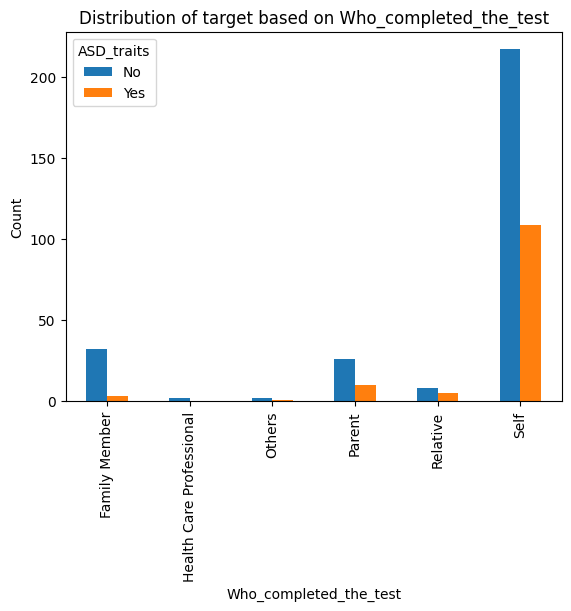

In [12]:
import matplotlib.pyplot as plt

# Group the dataset by 'Who_completed_the_test' column and 'ASD_traits' column
grouped = df1.groupby(['Who_completed_the_test', 'ASD_traits']).size().unstack()

# Plotting the grouped data
grouped.plot(kind='bar')

# Adding labels and titles
plt.xlabel('Who_completed_the_test')
plt.ylabel('Count')
plt.title('Distribution of target based on Who_completed_the_test')

# Display the plot
plt.show()

In [13]:
df2=encod_data.copy()
freq1 = df2['Ethnicity'].value_counts(normalize=True)
freq2 = df2['Who_completed_the_test'].value_counts(normalize=True)

# Map the values to their frequencies
df2['Ethnicity_en'] = df2['Ethnicity'].map(freq1)
df2['Who_completed_the_test_en'] = df2['Who_completed_the_test'].map(freq2)
#removal
df2 =df2.drop('Ethnicity', axis=1)
df2 =df2.drop('Who_completed_the_test', axis=1)
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Jaundice,Family_mem_with_ASD,ASD_traits,Result,Ethnicity_en,Who_completed_the_test_en
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,6,0.424096,0.785542
1,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,1,8,0.031325,0.086747
2,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,6,0.424096,0.785542
3,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2,0.274699,0.084337
4,1,1,1,1,1,0,1,1,1,1,36.0,1,1,0,1,9,0.040964,0.785542


In [14]:
df2['Result'] = df2.iloc[:, 0:10].sum(axis=1)
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Jaundice,Family_mem_with_ASD,ASD_traits,Result,Ethnicity_en,Who_completed_the_test_en
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,6,0.424096,0.785542
1,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,1,8,0.031325,0.086747
2,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,6,0.424096,0.785542
3,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2,0.274699,0.084337
4,1,1,1,1,1,0,1,1,1,1,36.0,1,1,0,1,9,0.040964,0.785542


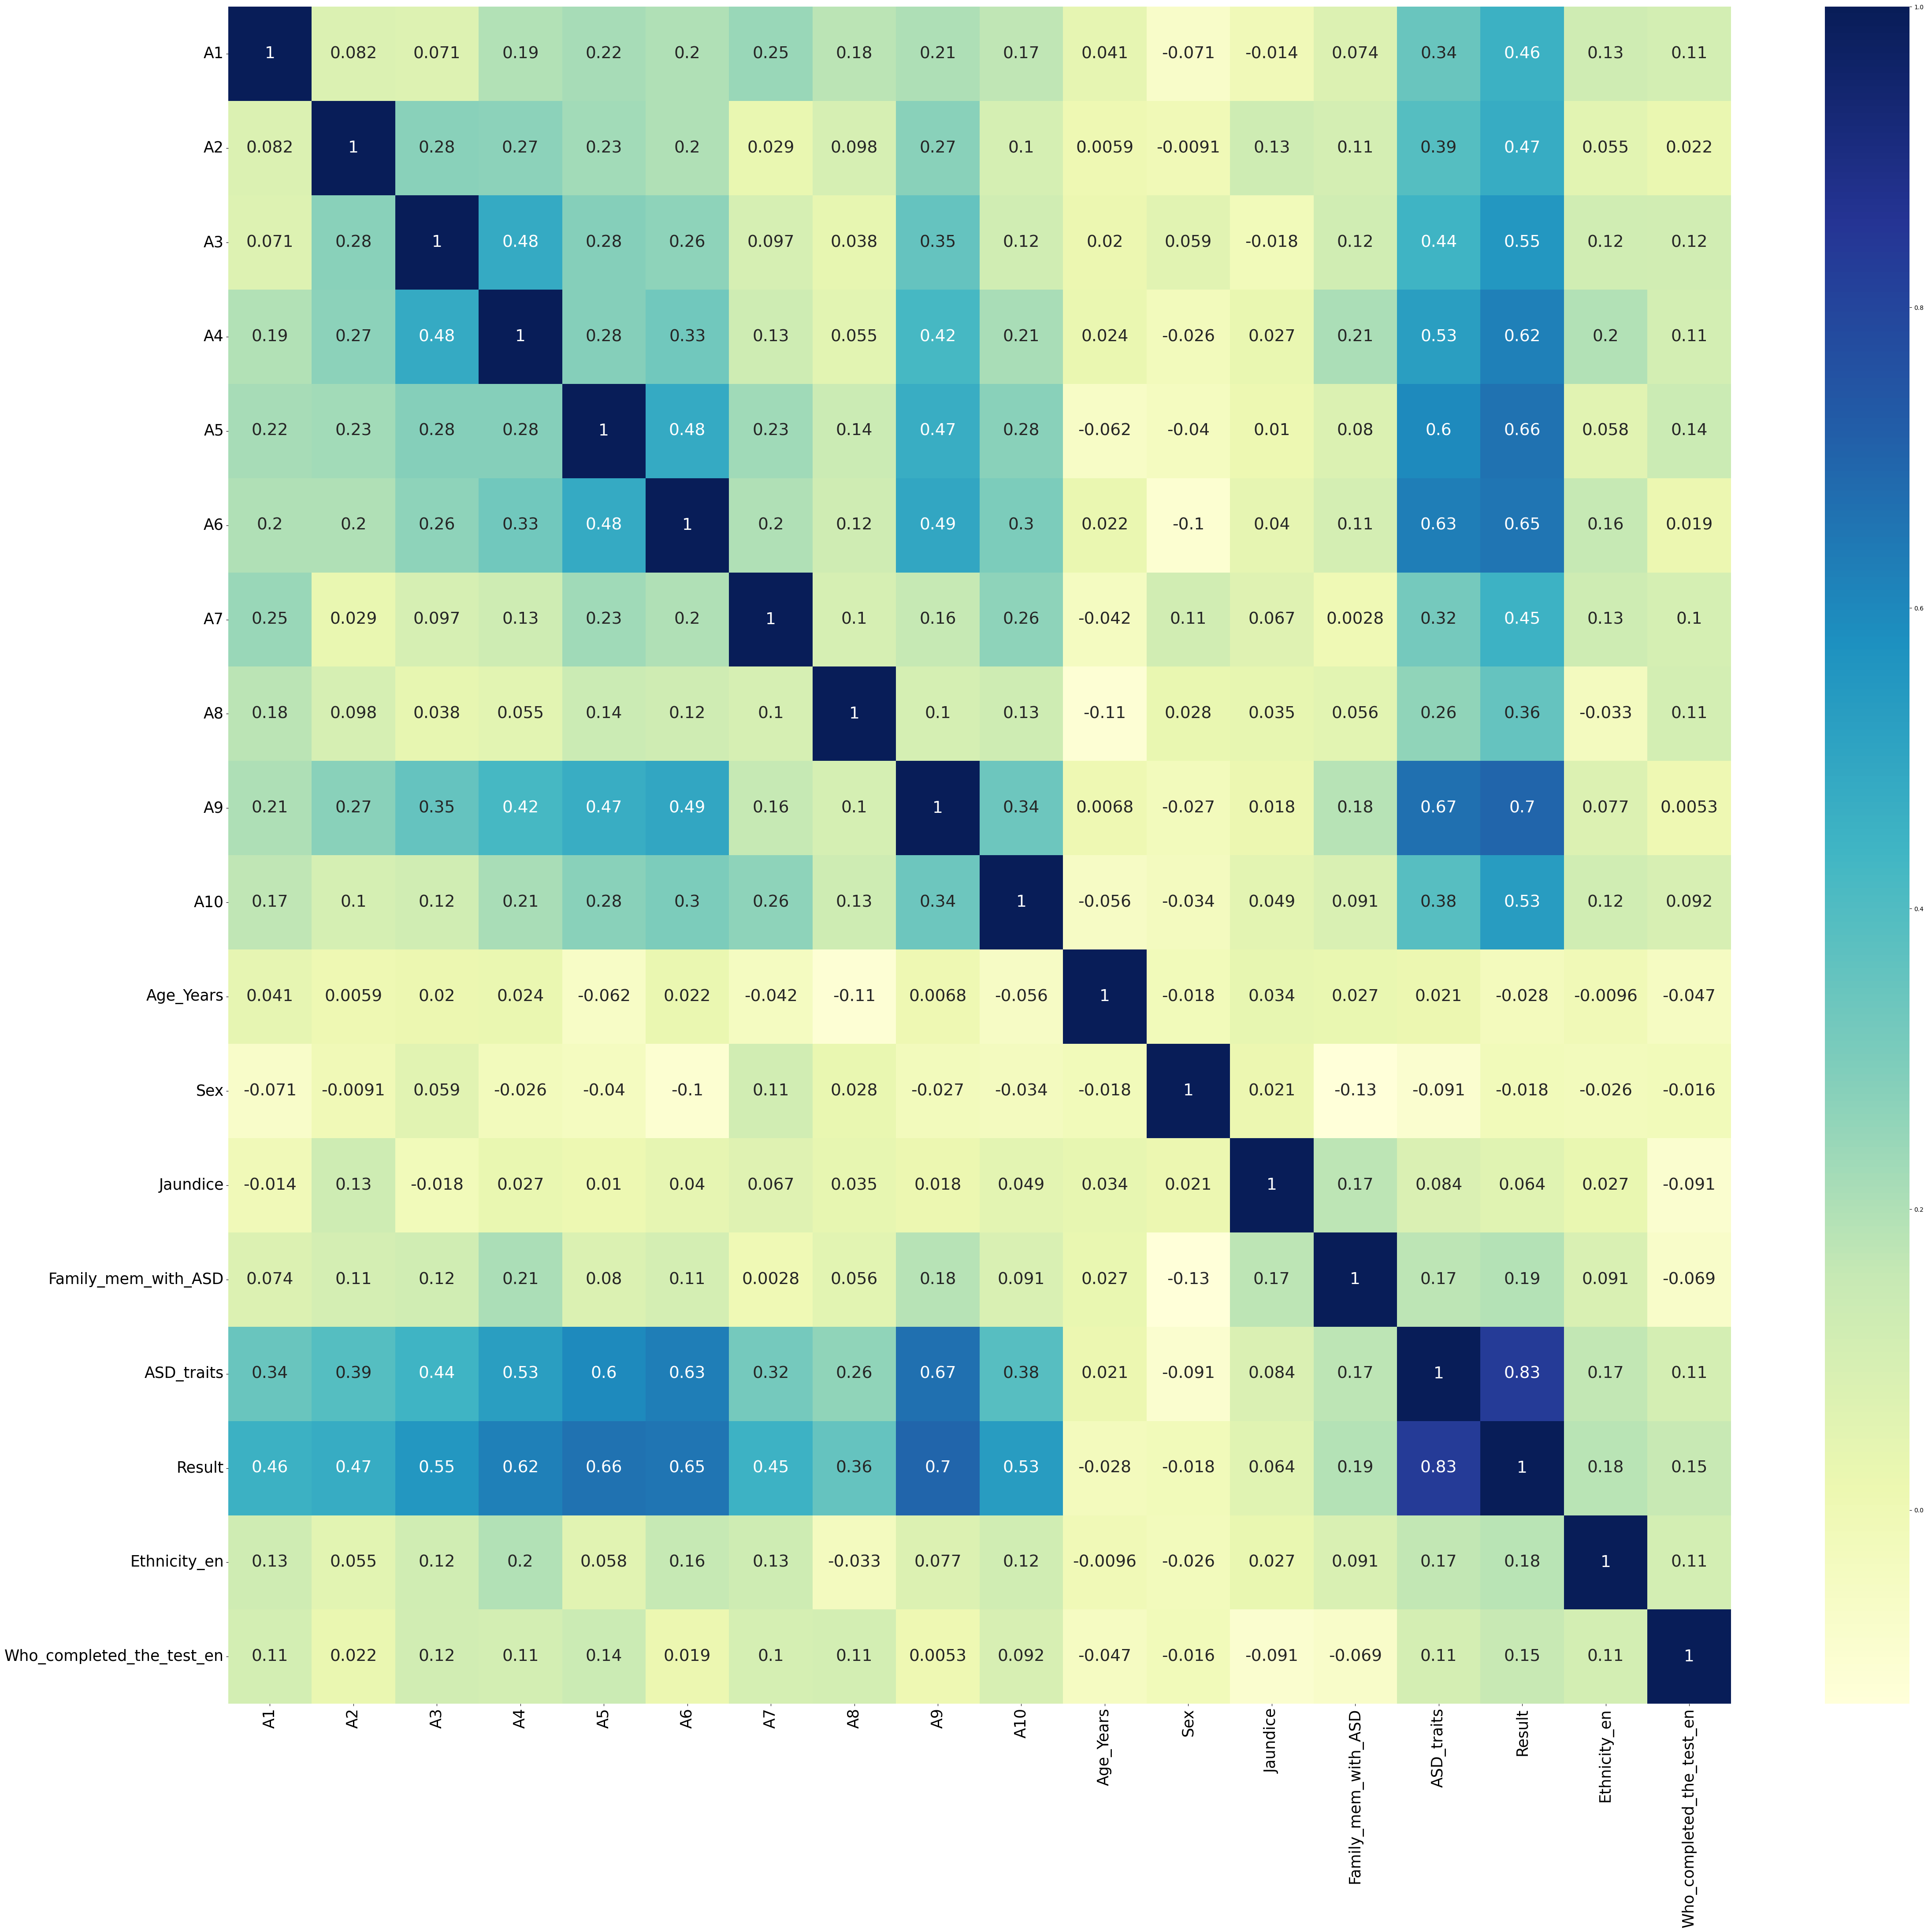

In [15]:
import seaborn as sns
# Generate the heatmap
plt.figure(figsize=(55,50))
ax = sns.heatmap(df2.corr(), annot=True, cmap="YlGnBu", annot_kws={"fontsize":27})
ax.tick_params(axis='both', which='major', labelsize=27)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=25)

plt.show()

# **Modelling with freq encoded data**

In [16]:
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, PowerTransformer, Normalizer

import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Jaundice,Family_mem_with_ASD,ASD_traits,Result,Ethnicity_en,Who_completed_the_test_en
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,6,0.424096,0.785542
1,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,1,8,0.031325,0.086747
2,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,6,0.424096,0.785542
3,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2,0.274699,0.084337
4,1,1,1,1,1,0,1,1,1,1,36.0,1,1,0,1,9,0.040964,0.785542


In [17]:
X = df2.drop('ASD_traits',axis=1)
y = df2.iloc[:,-4]
X.columns = X.columns.astype(str)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

n_estimators = 50
names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier',
         'SupportVectorMachine', 'AdaBoostClassifier','KNearestNeighbor','NaiveBayes','SGDClassifier']
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators), SVC(C=1.0, kernel='rbf',degree=3, gamma='scale'),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=None),
        n_estimators=n_estimators
    ),KNeighborsClassifier(n_neighbors=3),GaussianNB(), SGDClassifier()
    
]
# Create an empty dictionary to store the results
results = {'Model': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [],'Mean Score':[]}

for counter, model in enumerate(models):
    # Convert y_train and y_test to 1-dimensional arrays
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)
    
    # Train the model
    model.fit(X_train, y_train_flat)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate true positive, false positive, true negative, false negative
    tn, fp, fn, tp = confusion_matrix(y_test_flat, y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_test_flat, y_pred)
    
    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    # Store the results in the dictionary
    results['Model'].append(names[counter])
    results['Accuracy'].append(accuracy)
    results['Sensitivity'].append(sensitivity)
    results['Specificity'].append(specificity)
    results['Mean Score'].append((accuracy+sensitivity+specificity)/3)
# Create a dataframe from the results dictionary
scores = pd.DataFrame(results)
sorted_df = scores.sort_values(by='Mean Score', ascending=False)
sorted_df


,Model,Accuracy,Sensitivity,Specificity,Mean Score
0,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
4,AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000
2,ExtraTreesClassifier,0.971154,0.916667,1.000000,0.962607
6,NaiveBayes,0.923077,0.833333,0.970588,0.908999
5,KNearestNeighbor,0.913462,0.777778,0.985294,0.892178
7,SGDClassifier,0.875000,0.638889,1.000000,0.837963
3,SupportVectorMachine,0.836538,0.555556,0.985294,0.792463


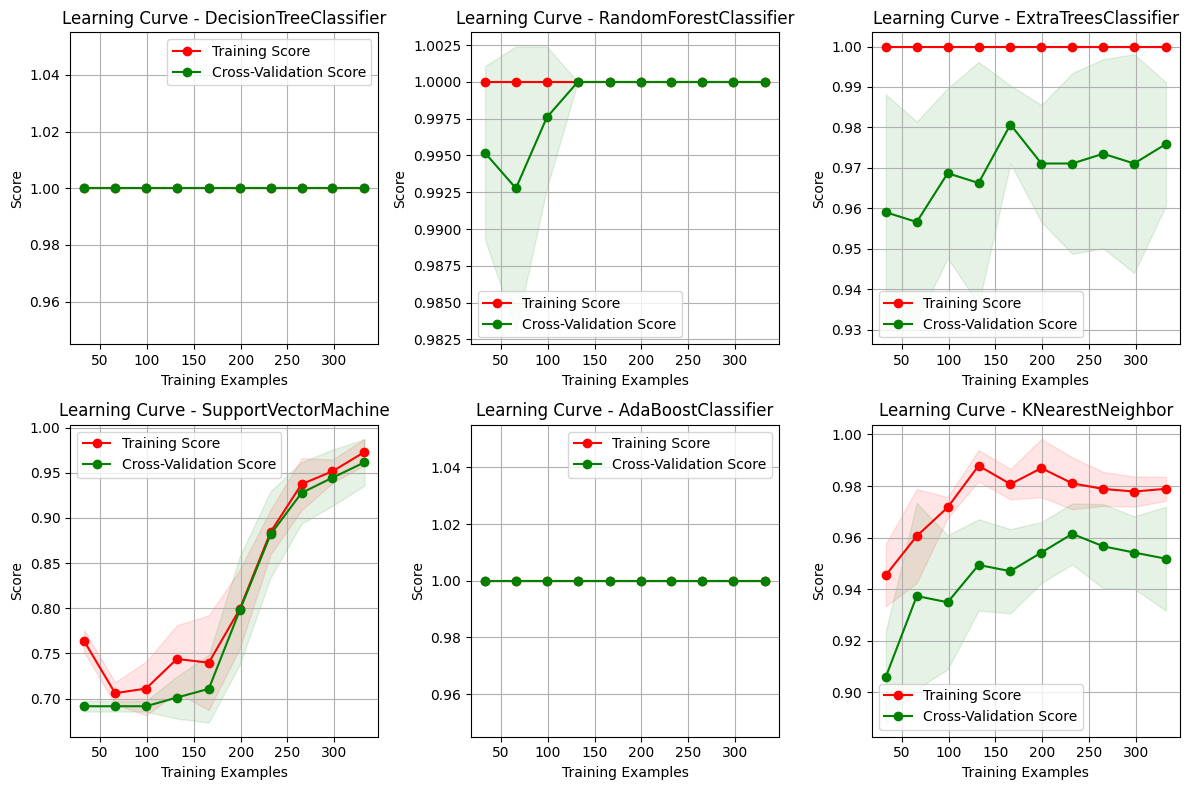

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Here is the existing code to split the data and define the models

# Define the train and test sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Define an empty dictionary to store the learning curve results
learning_curves = {}

for counter, model in enumerate(models):
    # Compute the learning curve for the current model
    train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes,
                                                                cv=5, scoring='accuracy')

    # Compute the mean and standard deviation of the train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Store the learning curve results in the dictionary
    model_name = names[counter]
    learning_curves[model_name] = {
        'TrainSizes': train_sizes_abs,
        'TrainScoresMean': train_scores_mean,
        'TrainScoresStd': train_scores_std,
        'TestScoresMean': test_scores_mean,
        'TestScoresStd': test_scores_std
    }

# Create subplots for each model
num_models = len(learning_curves)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Reshape the axes to flatten the 2D array
axes = axes.flatten()

# Plot the learning curves for each model
for ax, (model_name, curve_data) in zip(axes, learning_curves.items()):
    train_sizes_abs = curve_data['TrainSizes']
    train_scores_mean = curve_data['TrainScoresMean']
    train_scores_std = curve_data['TrainScoresStd']
    test_scores_mean = curve_data['TestScoresMean']
    test_scores_std = curve_data['TestScoresStd']

    # Plot the learning curve
    ax.set_title(f"Learning Curve - {model_name}")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training Score")
    ax.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    ax.legend(loc="best")

# Adjust spacing between subplots
plt.tight_layout()

# Show the learning curve plots
plt.show()

# **Modelling with one hot encoded data**

In [20]:
df3=encod_data.copy()
df3.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits,Result
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,0,Self,0,6
1,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,1,Parent,1,8
2,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,1,Self,0,6
3,1,0,0,0,0,0,0,1,0,0,40.0,0,Asian,0,0,Family Member,0,2
4,1,1,1,1,1,0,1,1,1,1,36.0,1,Others,1,0,Self,1,9


In [21]:
from sklearn.preprocessing import OneHotEncoder

cols= df3.select_dtypes('O').columns
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the data
X_encoded = []
for col in cols:
    col_data = df3[col].values.reshape(-1, 1)  # Reshape data to 2D array
    col_encoded = encoder.fit_transform(col_data)
    X_encoded.append(col_encoded)

# Concatenate encoded columns
X_encoded = np.concatenate(X_encoded, axis=1)
X_encoded_df = pd.DataFrame(X_encoded) # Convert numpy array to DataFrame

# select only the columns with numeric data types
num_df = df3.select_dtypes(include=['int', 'float'])

# Add one-hot encoded columns to numerical features
df4= pd.concat([num_df, X_encoded_df], axis=1)
df4.columns

Index([                 'A1',                  'A2',                  'A3',
                        'A4',                  'A5',                  'A6',
                        'A7',                  'A8',                  'A9',
                       'A10',           'Age_Years',            'Jaundice',
       'Family_mem_with_ASD',          'ASD_traits',              'Result',
                           0,                     1,                     2,
                           3,                     4,                     5,
                           6,                     7,                     8,
                           9,                    10,                    11,
                          12,                    13,                    14,
                          15,                    16,                    17,
                          18],
      dtype='object')

In [22]:
X = df4.drop('ASD_traits',axis=1)
y = df4.iloc[:,13]
X.columns = X.columns.astype(str)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

n_estimators = 50
names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier',
         'SupportVectorMachine', 'AdaBoostClassifier','KNearestNeighbor','NaiveBayes','SGDClassifier']
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators), SVC(C=1.0, kernel='rbf',degree=3, gamma='scale'),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=None),
        n_estimators=n_estimators
    ),KNeighborsClassifier(n_neighbors=3),GaussianNB(), SGDClassifier()
    
]
# Create an empty dictionary to store the results
results = {'Model': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [],'Mean Score':[]}

for counter, model in enumerate(models):
    # Convert y_train and y_test to 1-dimensional arrays
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)
    
    # Train the model
    model.fit(X_train, y_train_flat)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate true positive, false positive, true negative, false negative
    tn, fp, fn, tp = confusion_matrix(y_test_flat, y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_test_flat, y_pred)
    
    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    # Store the results in the dictionary
    results['Model'].append(names[counter])
    results['Accuracy'].append(accuracy)
    results['Sensitivity'].append(sensitivity)
    results['Specificity'].append(specificity)
    results['Mean Score'].append((accuracy+sensitivity+specificity)/3)
# Create a dataframe from the results dictionary
scores = pd.DataFrame(results)
sorted_df = scores.sort_values(by='Mean Score', ascending=False)
sorted_df


,Model,Accuracy,Sensitivity,Specificity,Mean Score
0,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
4,AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000
7,SGDClassifier,0.942308,0.944444,0.941176,0.942643
2,ExtraTreesClassifier,0.951923,0.888889,0.985294,0.942035
5,KNearestNeighbor,0.913462,0.833333,0.955882,0.900892
6,NaiveBayes,0.836538,0.888889,0.808824,0.844750
3,SupportVectorMachine,0.826923,0.527778,0.985294,0.779998


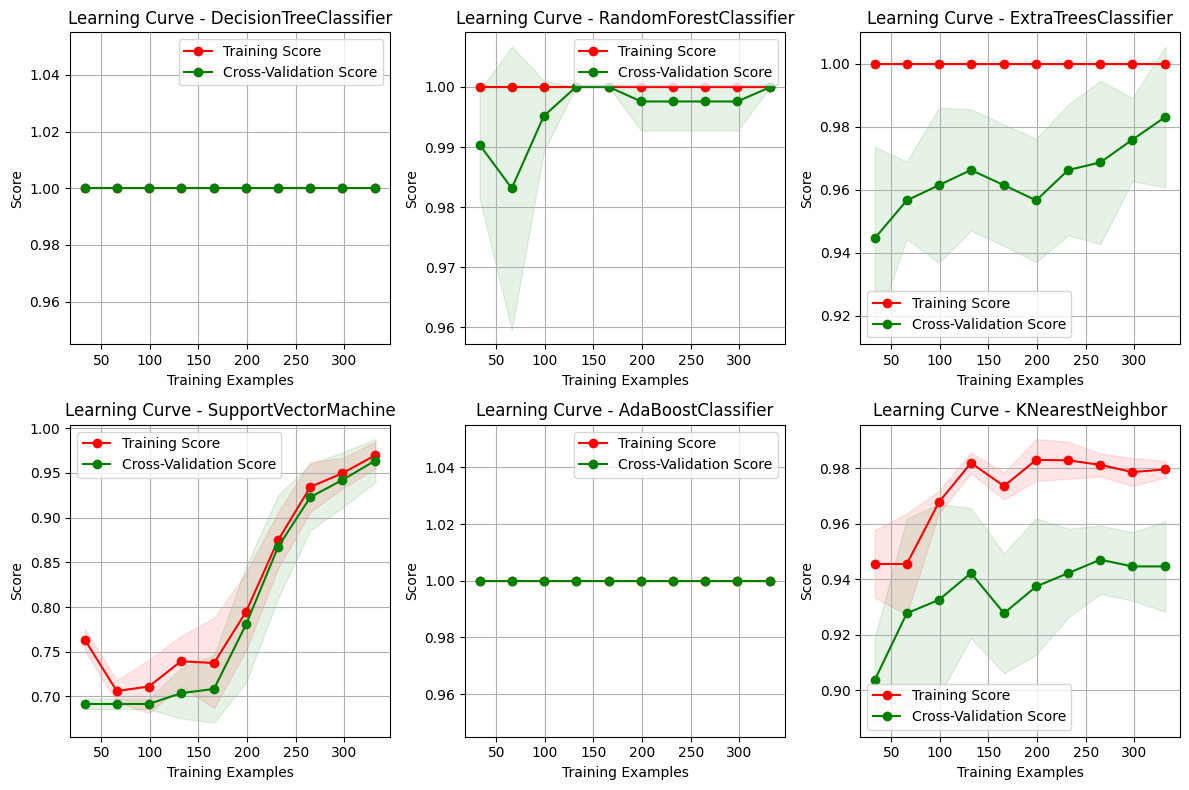

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Here is the existing code to split the data and define the models

# Define the train and test sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Define an empty dictionary to store the learning curve results
learning_curves = {}

for counter, model in enumerate(models):
    # Compute the learning curve for the current model
    train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes,
                                                                cv=5, scoring='accuracy')

    # Compute the mean and standard deviation of the train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Store the learning curve results in the dictionary
    model_name = names[counter]
    learning_curves[model_name] = {
        'TrainSizes': train_sizes_abs,
        'TrainScoresMean': train_scores_mean,
        'TrainScoresStd': train_scores_std,
        'TestScoresMean': test_scores_mean,
        'TestScoresStd': test_scores_std
    }

# Create subplots for each model
num_models = len(learning_curves)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Reshape the axes to flatten the 2D array
axes = axes.flatten()

# Plot the learning curves for each model
for ax, (model_name, curve_data) in zip(axes, learning_curves.items()):
    train_sizes_abs = curve_data['TrainSizes']
    train_scores_mean = curve_data['TrainScoresMean']
    train_scores_std = curve_data['TrainScoresStd']
    test_scores_mean = curve_data['TestScoresMean']
    test_scores_std = curve_data['TestScoresStd']

    # Plot the learning curve
    ax.set_title(f"Learning Curve - {model_name}")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training Score")
    ax.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    ax.legend(loc="best")

# Adjust spacing between subplots
plt.tight_layout()

# Show the learning curve plots
plt.show()

# **Modelling with under_sampled data**

In [25]:
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Jaundice,Family_mem_with_ASD,ASD_traits,Result,Ethnicity_en,Who_completed_the_test_en
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,6,0.424096,0.785542
1,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,1,8,0.031325,0.086747
2,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,6,0.424096,0.785542
3,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2,0.274699,0.084337
4,1,1,1,1,1,0,1,1,1,1,36.0,1,1,0,1,9,0.040964,0.785542


In [26]:
df2.iloc[:,-4].value_counts()

ASD_traits
0    287
1    128
Name: count, dtype: int64

In [27]:
class_count_0, class_count_1 = df2.iloc[:,-4].value_counts()

In [28]:
class_0 = df2[df2["ASD_traits"] == 0]
class_1 = df2[df2["ASD_traits"] == 1]

In [29]:
class_0_under = class_0.sample(class_count_1)

In [30]:
data_under = pd.concat([class_0_under, class_1], axis = 0).reset_index().drop("index", axis = 1)
data_under.iloc[:,-4].value_counts()

ASD_traits
0    128
1    128
Name: count, dtype: int64

In [31]:
X = data_under.drop('ASD_traits',axis=1)
y = data_under.iloc[:,13]
X.columns = X.columns.astype(str)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = 50
names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier',
         'SupportVectorMachine', 'AdaBoostClassifier','KNearestNeighbor','NaiveBayes','SGDClassifier']
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators), SVC(C=1.0, kernel='rbf',degree=3, gamma='scale'),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=None),
        n_estimators=n_estimators
    ),KNeighborsClassifier(n_neighbors=3),GaussianNB(), SGDClassifier()
    
]
# Create an empty dictionary to store the results
results = {'Model': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': []}

for counter, model in enumerate(models):
    # Convert y_train and y_test to 1-dimensional arrays
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)
    
    # Train the model
    model.fit(X_train, y_train_flat)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate true positive, false positive, true negative, false negative
    tn, fp, fn, tp = confusion_matrix(y_test_flat, y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_test_flat, y_pred)
    
    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    # Store the results in the dictionary
    results['Model'].append(names[counter])
    results['Accuracy'].append(accuracy)
    results['Sensitivity'].append(sensitivity)
    results['Specificity'].append(specificity)

# Create a dataframe from the results dictionary
scores = pd.DataFrame(results)

# Print the dataframe
scores

,Model,Accuracy,Sensitivity,Specificity
0,DecisionTreeClassifier,1.000000,1.0,1.000000
1,RandomForestClassifier,1.000000,1.0,1.000000
2,ExtraTreesClassifier,1.000000,1.0,1.000000
3,SupportVectorMachine,0.884615,0.0,1.000000
4,AdaBoostClassifier,1.000000,1.0,1.000000
5,KNearestNeighbor,0.788462,0.0,0.891304
6,NaiveBayes,1.000000,1.0,1.000000
7,SGDClassifier,1.000000,1.0,1.000000


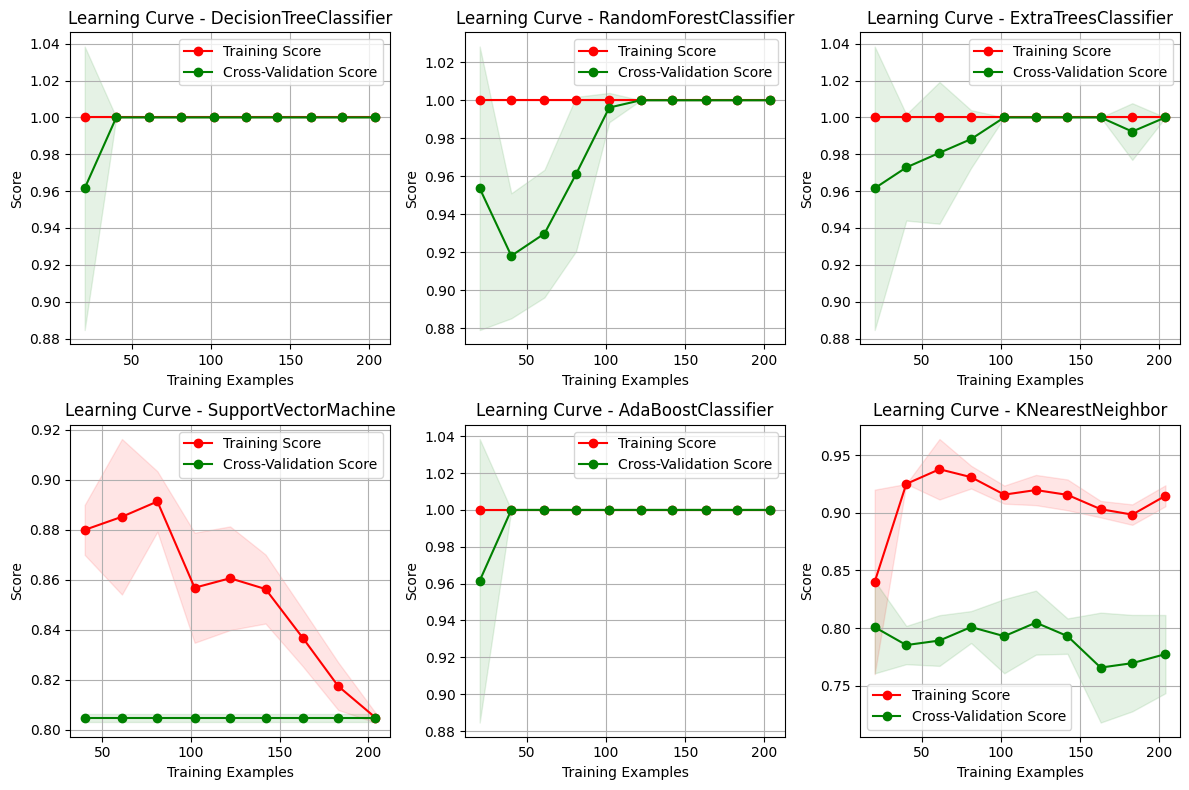

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Here is the existing code to split the data and define the models

# Define the train and test sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Define an empty dictionary to store the learning curve results
learning_curves = {}

for counter, model in enumerate(models):
    # Compute the learning curve for the current model
    train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes,
                                                                cv=5, scoring='accuracy')

    # Compute the mean and standard deviation of the train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Store the learning curve results in the dictionary
    model_name = names[counter]
    learning_curves[model_name] = {
        'TrainSizes': train_sizes_abs,
        'TrainScoresMean': train_scores_mean,
        'TrainScoresStd': train_scores_std,
        'TestScoresMean': test_scores_mean,
        'TestScoresStd': test_scores_std
    }

# Create subplots for each model
num_models = len(learning_curves)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Reshape the axes to flatten the 2D array
axes = axes.flatten()

# Plot the learning curves for each model
for ax, (model_name, curve_data) in zip(axes, learning_curves.items()):
    train_sizes_abs = curve_data['TrainSizes']
    train_scores_mean = curve_data['TrainScoresMean']
    train_scores_std = curve_data['TrainScoresStd']
    test_scores_mean = curve_data['TestScoresMean']
    test_scores_std = curve_data['TestScoresStd']

    # Plot the learning curve
    ax.set_title(f"Learning Curve - {model_name}")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training Score")
    ax.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    ax.legend(loc="best")

# Adjust spacing between subplots
plt.tight_layout()

# Show the learning curve plots
plt.show()

# **Modelling with feature scalling**

In [34]:
# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model=scaler.fit(df2)
scaled_df=model.transform(df2)
 
# print scaled features
print(scaled_df)

[[1.         1.         1.         ... 0.6        1.         1.        ]
 [1.         1.         0.         ... 0.8        0.06857143 0.10493827]
 [1.         1.         0.         ... 0.6        1.         1.        ]
 ...
 [1.         0.         0.         ... 0.3        0.03428571 0.10493827]
 [1.         0.         0.         ... 0.6        0.10285714 1.        ]
 [1.         0.         1.         ... 0.8        1.         1.        ]]


In [35]:
df5 = pd.DataFrame(scaled_df, columns = df2.columns)
df5

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Jaundice,Family_mem_with_ASD,ASD_traits,Result,Ethnicity_en,Who_completed_the_test_en
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.002793,0.0,0.0,0.0,0.0,0.6,1.000000,1.000000
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.005587,1.0,1.0,1.0,1.0,0.8,0.068571,0.104938
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.027933,0.0,0.0,1.0,0.0,0.6,1.000000,1.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.041899,0.0,0.0,0.0,0.0,0.2,0.645714,0.101852
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.030726,1.0,1.0,0.0,1.0,0.9,0.091429,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.005587,0.0,0.0,0.0,1.0,1.0,0.022857,1.000000
411,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.7,1.000000,1.000000
412,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.025140,1.0,0.0,0.0,0.0,0.3,0.034286,0.104938
413,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.027933,1.0,0.0,0.0,0.0,0.6,0.102857,1.000000


In [36]:
X = df5.drop('ASD_traits',axis=1)
y = df5.iloc[:,13]
X.columns = X.columns.astype(str)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators = 50
names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier',
         'SupportVectorMachine', 'AdaBoostClassifier','KNearestNeighbor','NaiveBayes','SGDClassifier']
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators), SVC(C=1.0, kernel='rbf',degree=3, gamma='scale'),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=None),
        n_estimators=n_estimators
    ),KNeighborsClassifier(n_neighbors=3),GaussianNB(), SGDClassifier()
    
]
# Create an empty dictionary to store the results
results = {'Model': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': []}

for counter, model in enumerate(models):
    # Convert y_train and y_test to 1-dimensional arrays
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)
    
    # Train the model
    model.fit(X_train, y_train_flat)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate true positive, false positive, true negative, false negative
    tn, fp, fn, tp = confusion_matrix(y_test_flat, y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_test_flat, y_pred)
    
    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    # Store the results in the dictionary
    results['Model'].append(names[counter])
    results['Accuracy'].append(accuracy)
    results['Sensitivity'].append(sensitivity)
    results['Specificity'].append(specificity)

# Create a dataframe from the results dictionary
scores = pd.DataFrame(results)

# Print the dataframe
scores

,Model,Accuracy,Sensitivity,Specificity
0,DecisionTreeClassifier,1.000,1.0000,1.0
1,RandomForestClassifier,1.000,1.0000,1.0
2,ExtraTreesClassifier,1.000,1.0000,1.0
3,SupportVectorMachine,1.000,1.0000,1.0
4,AdaBoostClassifier,1.000,1.0000,1.0
5,KNearestNeighbor,0.944,0.5625,1.0
6,NaiveBayes,1.000,1.0000,1.0
7,SGDClassifier,1.000,1.0000,1.0


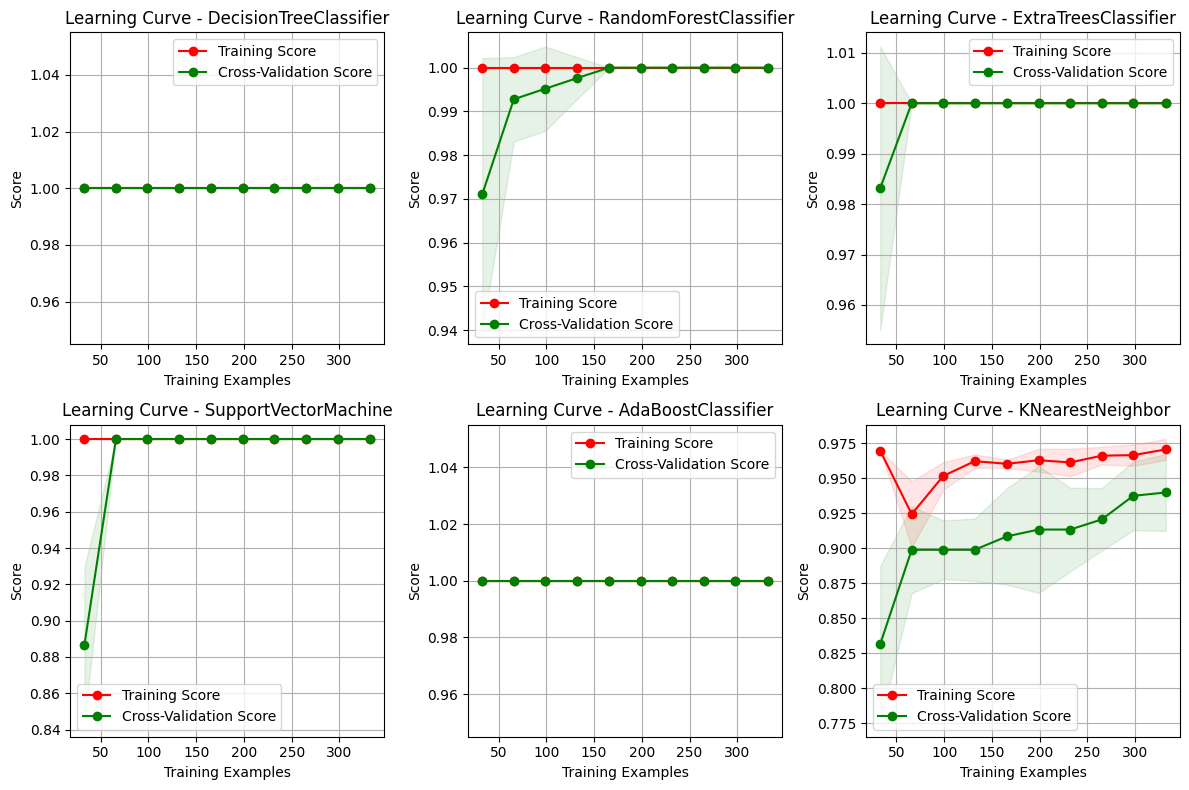

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Here is the existing code to split the data and define the models

# Define the train and test sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Define an empty dictionary to store the learning curve results
learning_curves = {}

for counter, model in enumerate(models):
    # Compute the learning curve for the current model
    train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes,
                                                                cv=5, scoring='accuracy')

    # Compute the mean and standard deviation of the train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Store the learning curve results in the dictionary
    model_name = names[counter]
    learning_curves[model_name] = {
        'TrainSizes': train_sizes_abs,
        'TrainScoresMean': train_scores_mean,
        'TrainScoresStd': train_scores_std,
        'TestScoresMean': test_scores_mean,
        'TestScoresStd': test_scores_std
    }

# Create subplots for each model
num_models = len(learning_curves)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Reshape the axes to flatten the 2D array
axes = axes.flatten()

# Plot the learning curves for each model
for ax, (model_name, curve_data) in zip(axes, learning_curves.items()):
    train_sizes_abs = curve_data['TrainSizes']
    train_scores_mean = curve_data['TrainScoresMean']
    train_scores_std = curve_data['TrainScoresStd']
    test_scores_mean = curve_data['TestScoresMean']
    test_scores_std = curve_data['TestScoresStd']

    # Plot the learning curve
    ax.set_title(f"Learning Curve - {model_name}")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training Score")
    ax.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    ax.legend(loc="best")

# Adjust spacing between subplots
plt.tight_layout()

# Show the learning curve plots
plt.show()

In [39]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model to disk
joblib.dump(model, 'model.pkl')


['model.pkl']